# Student Performance in Secondary School
## Learning Objective
*Here in this assignment, we will be using the same dataset we used in the assignment of Linear regression i.e Student Performance Dataset.*

Here, you will train Logistic regression to predict if the students pass or fail given different features and also, evaluate the performance of the model.

<b><div style="text-align: right">[TOTAL POINTS: 10]</div></b>



## Dataset Description:

**Student Performance Data Set**

*Source:* https://archive.ics.uci.edu/ml/datasets/Student+Performance \
*Author:* Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez \
*Original Source:* P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.


This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008](http://www3.dsi.uminho.pt/pcortez/student.pdf), the two datasets were modeled under binary/five-level classification and regression tasks.  But here we are only using it binary classification task.

**Number of Instances:** 395 \
**Number of Attributes:** 32 **Input Features** + 1 **Target**('G3')

### Attribute Information:

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
33. **G3 - final grade (numeric: from 0 to 20, output target)**


**Note:** the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful.


This is a regression problem that you already solved in the previous module. To model this as the classification problem we somehow need to convert the numeric values to categories.
One way to do so is by predicting if student passes or fails i.e binary classification, rather than predicting the score itself.

In the dataset `G3` is the final grade score. We can define a passing criteria such that, if the G3 Score is less than 10, the student fails, and if the G3 score is greater than or equal to 10, the student pass.


### Import libraries and load the dataset.


In [1]:
### Import Necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Exercise 1 : Load the data.
<b><div style="text-align: right">[UNGRADED]</div></b>

**Task:**


*  Load the data using `DATASET_URL`  as pandas dataframe in `df`





In [8]:
### Ex-1-Task-1
df = None
DATASET_URL = "https://drive.google.com/uc?id=1L5I9MhhLMgopPSA9YLhXqmhDoYMSu7mN"

### BEGIN SOLUTION
# your code here
df = pd.read_csv(DATASET_URL, sep=';')
### END SOLUTION
print("Shape of Data", df.shape)
df.head()

Shape of Data (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:

assert df is not None
assert(df.shape == (395, 33))


There are no missing values in the dataset, and also values are in the range specified, so we are good to go.

The dataset contains 32 features and 395 entries. G3 is the target variable. Among 32 features, are all of them useful? There are some ordinal, nominal features. We will find out if all of them are useful or not and how the model improves by using all features or some selected features.

### Exercise 2: Assign data and target.
<b><div style="text-align: right">[POINTS: 1]</div></b>

**Task:**


*   Assigning data and target to `X` and `y` respectively.

  `X` -> all the features except target column G3

  `y` -> G3 ( Target variable)



*  Convert `y` to a categorical variable.

> a. G3 score of greater than or equal to pass mark, label as a pass ( 1 )

> b. G3 score of less than pass mark, label as a fail ( 0 )






The output after converting `y` to the categorical variable should be like this.

<table style="border-collapse:collapse;border-spacing:0" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:middle"><span style="font-weight:bold">y</span></th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:top" rowspan="5"><span style="font-weight:bold"></span> <br>(<span style="font-weight:bold">After Conversion</span>) ------&gt;</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:top"><span style="font-weight:bold">y</span></th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:top">10</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;style="font-family:Arial, sans-serif;font-size:14px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:top">1</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:top">12</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;style="font-family:Arial, sans-serif;font-size:14px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:top">1</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:middle">8</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;style="font-family:Arial, sans-serif;font-size:14px;padding:10px 10px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;text-align:center;vertical-align:top">0</td></tr></table>

<center>Conversion of target variable y to categorical variable</center>


* Hint: `Pandas.series.apply()` function might come in handy

In [44]:
### Ex-2-Task-1

passing_mark = 10
X = None
y = None

# Use 10 as passing mark, DON'T CHANGE

# Exercise 2 / Task 1
### BEGIN SOLUTION
X = df.drop(columns=['G3'])
y = df['G3'].apply(lambda score: 1 if score >= passing_mark else 0)
# your code here
### END SOLUTION

In [45]:

assert(X.shape == (395, 32))
assert(y.shape == (395,))

In [46]:
# Number of data points in each class

y.value_counts()

G3
1    265
0    130
Name: count, dtype: int64

### Exercise 3: Splitting into train and test set
<b><div style="text-align: right">[UNGRADED]</div></b>

Use Scikit learn `train_test_split` method to split the dataset features `X` and labels `y`, as 80 % for training and 20% for testing.

**Task:** :  Split in 80-20% ratio using `random_seed` provided.


In [47]:
### Ex-3-Task-1

X_train, X_test, y_train, y_test = None, None, None, None
random_seed = 0
### BEGIN SOLUTION
# your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = random_seed)
### END SOLUTION

In [48]:

assert not X_train is None
assert not y_train is None
assert not X_test is None
assert not y_test is None

assert(y_train.shape == (316,))
assert(y_test.shape == (79,))

### Exercise 4: Correlations.
<b><div style="text-align: right">[POINTS: 1]</div></b>

**Task:**


*   Check the correlation of all the numerical features with the target G3, and extract the top 5 features among them to variable `top_five`

* The variable `corr` should contain the correlation between features and the target. It should contain a series object with features as index and correlation as it's value.

*  The variable `top_five` should consist of a `list` of top five features based on correlation with the target variable.

Hints:
- Use `pandas.DataFrame.corrwith` function to compute correlation between `X_train` and `y_train` for variable `corr`

- Keep in mind that a feature may have a positive or negative correlation with the target. The top five features with strong positive or negative correlation with target should be chosen. `numpy.abs` or `numpy.absolute` functions might come in handy.

-





In [49]:
### Ex-4-Task-1
corr = None
top_five = None

### BEGIN SOLUTION
corr = X_train.select_dtypes(include='number').corrwith(y_train)
top_five = np.abs(corr).sort_values(ascending=False).head(5).index.tolist()
corr[top_five]
### END SOLUTION

G2          0.721287
G1          0.645108
failures   -0.339825
age        -0.198607
goout      -0.190767
dtype: float64

In [50]:
assert(top_five[0] =='G2')
assert(top_five[-1]=='goout')

### Exercise 5: Fit Logistic Regression model on top 5 features.
<b><div style="text-align: right">[POINTS: 1]</div></b>

**Task:**


*   Instantiate the `LogisticRegression` object as `log_reg_top5`

*  Fit the model with the top 5 features using the training set.

*  Save coefficient in `theta` and `intercept`.





In [53]:
### Ex-5-Task-1

log_reg_top5 = None
theta = None
intercept = None
### BEGIN SOLUTION
# your code here
from sklearn.linear_model import LogisticRegression

log_reg_top5 = LogisticRegression()
log_reg_top5.fit(X_train[top_five], y_train)
theta = log_reg_top5.coef_
intercept = log_reg_top5.intercept_
### END SOLUTION
print(theta)
print(intercept)

[[ 1.59444084  0.21939253 -0.06431612 -0.42133997 -0.13873873]]
[-8.86484257]


In [54]:
assert  log_reg_top5 is not None
assert log_reg_top5 is not None
assert hasattr(log_reg_top5, 'coef_')
assert hasattr(log_reg_top5 , 'intercept_')
assert theta.size == 5

### Exercise 6:Model prediction.
<b><div style="text-align: right">[POINTS: 2]</div></b>

**Tasks:**


*  Predict the classes for whole test set `X_test` and store in `y_pred`. Remember to use only `top_five` features.

* Predict the probability of outcome of the second entry i.e. index number 318, from `X_test` and store it in `y_pred_proba_318`. Remember, you need to store only the maximum probability in `y_pred_proba_318`. The `max()` function may come handy.

Check the documentation, how logistic regression outputs probability [Predicting probability of outcome](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)


*Note: Use the top five features in predicting. We trained on top five features.*

*Note: Numpy reshape feature might come handy here*






In [56]:
# first five entries in X_test
X_test[top_five].head()

,G2,G1,failures,age,goout
329,14,14,0,17,3
318,11,11,0,17,4
317,10,9,0,18,4
65,15,16,0,16,3
59,16,15,0,16,3


In [57]:
### Ex-6-Task-1

y_pred = None
y_pred_proba_318 = None
### BEGIN SOLUTION
# your code here
y_pred = log_reg_top5.predict(X_test[top_five])
y_pred_proba_318 = log_reg_top5.predict_proba(X_test[top_five].iloc[1:2])[0].max()
### END SOLUTION

# round off
y_pred_proba = round(y_pred_proba_318, 2)

print(y_pred.shape)
print(y_pred_proba)

(79,)
0.97


In [58]:
assert(y_pred.shape == (79,))
assert(y_pred_proba_318 > 0.65)

### Exercise 7  : Model evaluation ( Accuracy )
<b><div style="text-align: right">[POINTS: 1]</div></b>

Now, its time to check how good is our model is performing. One evaluation metric, which can be used here is `accuracy` which gives the ratio of correctly classified points to the total number of points.

Remember, we test our model in unseen data i.e., with the test set.


**Task:**


* Calculate the `accuracy` of our model in the test set.

Sklearn provides default evaluation metrics for the classification problem. Check here [Scikit Learn - Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

Here, Positive class refers to as 1. i.e. Pass.



In [59]:
### Ex-7-Task-1

# Calculate Accuracy
accuracy = None

### BEGIN SOLUTION
# your code here
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
### END SOLUTION
print("Accuracy of the Model with Top 5 features", round(accuracy,2))

Accuracy of the Model with Top 5 features 0.87


In [60]:

assert(accuracy is not None)
assert(accuracy >= 0.85), 'TEST FAILED'

As we know, accuracy is not a reliable metric in case of an Imbalanced dataset. There are other metrics such as recall, precision, F1 Score for better evaluation of the model.

Now, let us check the recall, precision, F1 Score of our classifier.

Before that, lets plot confusion matrix.

Here, we have already provided code snippet to print the confusion matrix.

In [61]:
### The number of true positives, true negatives, false positives, false negatives

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 46
True Negative 23
False Positive 7
False Negative 3


D:\FuseMachines Fellowship\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


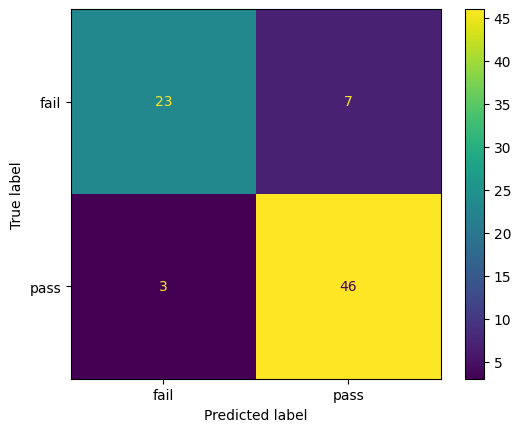

In [62]:
### Plot confusion matrix

class_names =['fail', 'pass']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_reg_top5, X_test[top_five].values, y_test, display_labels=class_names);


Here, from the confusion matrix, we see that our model works very well for positive class i.e, `pass`. Only three instances of the positive class are miss-classified.
Similarly, Seven instances of Negative class i.e, `fail` are misclassified.



### Exercise 8 : Model Evaluation.
<b><div style="text-align: right">[POINTS: 1]</div></b>

**Task:**


*  Complete the function `calculate_score` to calculate `accuracy` , `f1 Score`, `precision` and `recall` for the test set.

In [63]:
### Ex-8-Task-1

accuracy, precision, recall, f1Score = None, None, None, None

# Complete the Function below.

def calculate_score(y_test, y_pred):

### BEGIN SOLUTION
# your code here
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1Score = f1_score(y_test, y_pred)

### END SOLUTION
    return accuracy, precision, recall, f1Score


# Call calculate_accuracy function
accuracy, precision, recall, f1Score = calculate_score(y_test, y_pred)


In [64]:

y_pred_check = np.array([1.,0.,0.,0.,1.,1.,1.])
y_test_check = np.array([1.,1.,0.,1.,1.,1.,0.])
accuracy_check,precision_check,recall_check,f1Score_check = calculate_score(y_test_check, y_pred_check)

assert(accuracy_check > 0.55), 'TEST FAILED'
assert(precision_check > 0.70), 'TEST FAILED'
assert(recall_check > 0.58), 'TEST FAILED'
assert(f1Score_check > 0.63), 'TEST FAILED'


In [65]:
accuracy,precision,recall,f1Score = calculate_score(y_test, y_pred)
print("Test Accuracy with top 5 features", round(accuracy,2))
print("Test Precision Score with top 5 features", round(precision,2))
print("Test Recall Score with top 5 features", round(recall,2))
print("Test F1 Score with top 5 features", round(f1Score,2))

Test Accuracy with top 5 features 0.87
Test Precision Score with top 5 features 0.87
Test Recall Score with top 5 features 0.94
Test F1 Score with top 5 features 0.9


Here, we used the top five features, which all were numeric. Our dataset also contains other features that are categorical, nominal. Lets now use those features.

### Variable Encoding

Machine learning algorithms cannot understand categorical strings such as student's sex (binary: 'F' - female or 'M' - male) unless we convert them to numerical values (0: 'F' and 1: 'M'). We can do this using Label Encoding.

**Label Encoding** assigns a value from 1 through N for each category for the feature, here we are assuming there are N categories. For eg:  Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) has already been encoded numerically.

Label Encoder assumes that there is some order in the data, i.e., value 2 is greater than value 1, which is good if the data is ordinal but it is not suitable for nominal data types without any inherent order, such as mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g., administrative or police), 'at_home' or 'other'), in such cases we need to perform some other encoding method, such as one-hot Encoding

**One-hot Encoding** maps each category to a vector that contains 1 and 0 denoting the presence or absence of the feature. Hence, this method will create multiple columns based on the features' cardinality, i.e., the number of categories in the feature. For: e.g.: Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g., administrative or police), 'at_home' or 'other') has four different categories. Hence four columns will be created.

This has been done for you in the following code. Do Check the columns of the new dataframe.

You can read about different types of Encoding [here](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02).

This has been implemented in the code below. Do check the new dataframe.

In [66]:
from sklearn.preprocessing import LabelEncoder

def preprocess(df):
    numeric = ['age', 'traveltime', 'Medu','Fedu', 'studytime', 'failures', 'famrel',
               'freetime', 'goout', 'Dalc', 'Walc', 'health' , 'absences', 'G1', 'G2']
    cat_nominal = ['Mjob', 'Fjob', 'reason', 'guardian']
    cat_binary = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
                  'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

    df[cat_binary] = df[cat_binary].apply(LabelEncoder().fit_transform)  # label_encoding

    df = pd.get_dummies(df, columns=cat_nominal, prefix=cat_nominal)  # one-hot encoding
    return df

X_train, X_test = preprocess(X_train), preprocess(X_test)
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
64,0,0,15,1,1,1,4,3,1,2,...,False,True,False,False,False,False,True,True,False,False
55,0,0,16,1,0,0,2,1,1,2,...,True,False,False,False,False,True,False,False,True,False
343,0,0,17,1,0,0,2,2,1,2,...,False,False,False,False,True,False,False,True,False,False
219,0,0,17,1,0,1,2,2,1,3,...,False,False,False,True,False,False,False,False,True,False
366,1,1,18,1,1,1,4,4,2,3,...,False,True,False,False,False,True,False,False,True,False


### Exercise 9: Fit Logistic regression model on all features.
<b><div style="text-align: right">[POINTS: 1]</div></b>

**Task:**


*   Instantiate the `LogisticRegression` object as `log_reg_all`

*  Fit the model with all features using training set as preprocessed above.

*  Save coefficients in `theta_all` and `intercept_all`.

*Note: Use `liblinear` as the solver in Logistic Regression*

Check out different solvers that Scikit-learn uses for Logistic regression.

[Logistic Regression Solvers](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [82]:
### Ex-9-Task-1

log_reg_all = None
theta_all = None
intercept_all = None

### BEGIN SOLUTION
# your code here
log_reg_all = LogisticRegression(solver='liblinear')
log_reg_all.fit(X_train, y_train)

theta_all = log_reg_all.coef_
intercept_all = log_reg_all.intercept_
### END SOLUTION


In [69]:

assert(theta_all is not None)
assert(intercept_all is not None)

assert(theta_all.shape == (1, 45)), 'TEST FAILED'
assert(intercept_all.shape == (1,)), 'TEST FAILED'


### Exercise 10:Model prediction and evaluation.
<b><div style="text-align: right">[POINTS: 1]</div></b>

**Task:**

*  Complete the function `calculate_score_all` to calculate `accuracy_all` , `f1 Score_all`, `precision_all` and `recall_all` for the test set.

We have already added code for plotting the Confusion matrix.


### Model Prediction

In [70]:
# Model prediction using all features

y_pred_all = log_reg_all.predict(X_test)



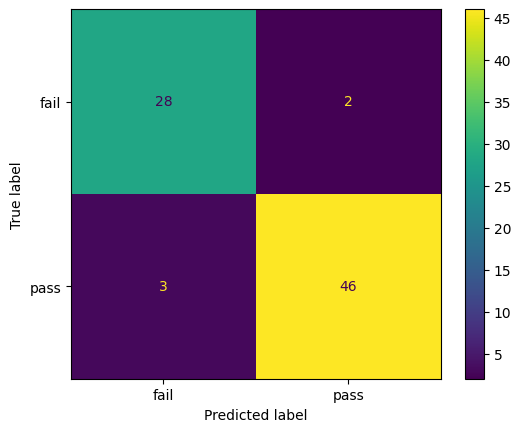

In [71]:
### Plot Confusion Matrix.
class_names =['fail', 'pass']
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_reg_all, X_test, y_test, display_labels=class_names);


In [72]:
### Print Number of True Positive, True Negative, False Positive and False Negative.

tn_all, fp_all, fn_all, tp_all = confusion_matrix(y_test, y_pred_all).ravel()
print("True Positive", tp_all)
print("True Negative", tn_all)
print("False Positive", fp_all)
print("False Negative", fn_all)

True Positive 46
True Negative 28
False Positive 2
False Negative 3


In [73]:
### Ex-10-Task-1
accuracy_all, precision_all, recall_all, f1Score_all = None, None, None, None

# Compute the metrics using the function calculate_score we created earlier.

### BEGIN SOLUTION
# your code here
accuracy_all, precision_all, recall_all, f1Score_all = calculate_score(y_test, y_pred_all)

### END SOLUTION

In [74]:


y_pred_check = np.array([1.,0.,1.,0.,1.,1.,1.])
y_test_check = np.array([1.,1.,0.,1.,1.,1.,0.])
accuracy_check_all,precision_check_all,recall_check_all,f1Score_check_all = calculate_score(y_test_check, y_pred_check)

assert(accuracy_check_all > 0.40), 'TEST FAILED'
assert(precision_check_all> 0.57), 'TEST FAILED'
assert(recall_check_all> 0.57) ,'TEST FAILED'
assert(f1Score_check_all> 0.57), 'TEST FAILED'


In [75]:
accuracy_all,precision_all,recall_all,f1Score_all = calculate_score(y_test, y_pred_all)
print("Test Accuracy using all features", round(accuracy_all,2))
print("Test Precision score using all features", round(precision_all,2))
print("Test Recall score using all features", round(recall_all,2))
print("Test F1 score using all features", round(f1Score_all,2))

Test Accuracy using all features 0.94
Test Precision score using all features 0.96
Test Recall score using all features 0.94
Test F1 score using all features 0.95


### Exercise 11 : How good are these values?
<b><div style="text-align: right">[POINTS: 1]</div></b>

One way to ensure we have good accuracy, the F1 score is to check using a baseline model. A baseline model is the one that predicts simply with some pre-defined rules.

Check documentation here [Baseline Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

**Task:**

*  Train a baseline model which predicts based on most frequent class, use all features for training.

*  Calculate accuracy and f1_score on test data


Hints:
- Use `DummyClassifier` from `sklearn.dummy` and initialize it in variable `base_model` with `most_frequent` strategy.



In [78]:
### Ex-11-Task-1

base_model = None
accuracy_base = None
f1score_base = None

### BEGIN SOLUTION
# your code here
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

base_model = DummyClassifier(strategy = 'most_frequent')
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)
f1score_base = f1_score(y_test, y_pred_base)

### END SOLUTION

print("   Test Accuracy with top 5 features", round(accuracy,2))
print("   Test F1 Score with top 5 features", round(f1Score,2))
print("---------------------------------------------------")
print("   Test Accuracy with Dummy Classifier", round(accuracy_base,2))
print("   Test F1 Score with Dummy Classifier",round(f1score_base,2))


   Test Accuracy with top 5 features 0.87
   Test F1 Score with top 5 features 0.9
---------------------------------------------------
   Test Accuracy with Dummy Classifier 0.62
   Test F1 Score with Dummy Classifier 0.77


In [79]:
assert(base_model is not None)
assert(accuracy_base is not None)
assert(f1score_base is not None)

assert(f1score_base >= 0.70)
assert(accuracy_base >= 0.55)


We can see here, our model is performing better than the baseline model.

Here in this assignment, we build a Logistic regression model to predict if students pass or fail given the information of students.
We first build the model with the top five features, where we got around 87% accuracy. Then, we build another Logistic regression model with all the features; we were able to get approximately 94% accuracy.

---

**Congratulations for successfully completing the assignment**.

Good Luck going forward with the course.
See you in the next section.

# Lets use our model for prediction.

*You are free to change the values and see how the model predicts.*


Suppose a student with the following scores :

1. G2 Score: 10

2. G1 Score: 8

3. failures: 1

4. age: 22

5. goout: 5

*We will be using the model trained with top five features.*

In [80]:

# top 5 features
pred_bef = [[10, 8, 1, 22, 5]]

#Converting into numpy array.
prediction = np.array(pred_bef)
prediction  = prediction.reshape(1, -1)
# predict the class.
pred = log_reg_top5.predict(prediction)
#predict the probability.
pred_proba = log_reg_top5.predict_proba(prediction)
max_1 = pred_proba.max()
max_1 = round(max_1, 2)

if pred == 0:
    print("Fail With {} probability.".format(max_1))
else:
    print("Pass with {} probability of".format(max_1))

Fail With 0.77 probability.


D:\FuseMachines Fellowship\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\FuseMachines Fellowship\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
